In [27]:
import pandas as pd
import gzip
import json
import numpy as np
pd.set_option('display.max_colwidth', -1)

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [28]:
file_path = "reviews_Cell_Phones_and_Accessories_5.json.gz"

In [29]:
phone_df = pd.read_json(file_path, lines = True)
phone_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :),5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]","Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one.",4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key.",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [30]:
phone_df_clean = phone_df.dropna().reset_index(drop = True)
phone_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190920 entries, 0 to 190919
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      190920 non-null  object
 1   asin            190920 non-null  object
 2   reviewerName    190920 non-null  object
 3   helpful         190920 non-null  object
 4   reviewText      190920 non-null  object
 5   overall         190920 non-null  int64 
 6   summary         190920 non-null  object
 7   unixReviewTime  190920 non-null  int64 
 8   reviewTime      190920 non-null  object
dtypes: int64(2), object(7)
memory usage: 13.1+ MB


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenpk\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


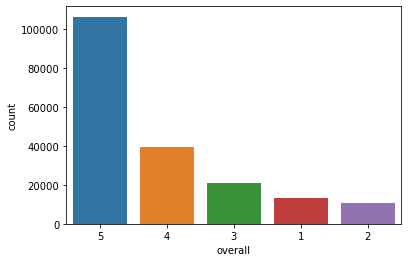

In [32]:
sns.countplot(phone_df_clean['overall'], order=phone_df_clean['overall'].value_counts(ascending=False).index)
plt.show()

In [33]:
reviewer_count = phone_df_clean['reviewerName'].value_counts(ascending=False)
reviewer_count.head()

Amazon Customer    3562
Pen Name           344 
John               268 
Chris              234 
Mike               224 
Name: reviewerName, dtype: int64

In [34]:
# Extract columns of interest into a new dataframe
data_df = phone_df_clean[['overall', 'reviewText']]
data_df.head()

,overall,reviewText
0,4,They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again
1,5,These stickers work like the review says they do. They stick on great and they stay on the phone. They are super stylish and I can share them with my sister. :)
2,5,These are awesome and make my phone look so stylish! I have only used one so far and have had it on for almost a year! CAN YOU BELIEVE THAT! ONE YEAR!! Great quality!
3,4,"Item arrived in great time and was in perfect condition. However, I ordered these buttons because they were a great deal and included a FREE screen protector. I never received one. Though its not a big deal, it would've been nice to get it since they claim it comes with one."
4,5,"awesome! stays on, and looks great. can be used on multiple apple products. especially having nails, it helps to have an elevated key."


In [35]:
# rename columns to class and text
df_renamed = data_df.rename(columns = {'overall': 'class', 'reviewText': 'text'})
df_renamed.tail()

,class,text
190915,5,Works great just like my original one. I really need extras of these for the car and house so love this and the price!
190916,5,Great product. Great packaging. High quality and apple certified. Works greats. This was a good replacement for my apple cable that is falling apart. I highly recommend this cable.
190917,5,"This is a great cable, just as good as the more expensive Apple one. My husband and my daughter both lost their original cables for their iPhones and they went the cheap route, buying a cheap replacement cable, I believe it messed up their battery memory because coincidentally both of them have battery hold/charge issues but my son and I do not. I used this cable to charge my husbands phone and it charged it from 3% to 100% in about an hour, that's about how long it takes my phone to charge but with the cheap cable his takes 2-1/2 hours. I'm thrilled with the quality of this cable, I'm hoping now that we have &#34;quality&#34; cables again, maybe the battery memory will improve on their phones. Great cable at a great price. I definitely recommend."
190918,5,I really like it becasue it works well with my Life Proof case. I do not have to remove the case to charge my phone.
190919,5,"product as described, I have wasted a lot of money on cords. I would buy them (usually on road trips) and then go to plug my phone in just to discover I have to work with cord and leave my phone sit while it was charging. This cord has not given me any issues, works just like my original!!"


In [36]:
# Extract 5% for Machine Learning
np.random.seed(42)
msk = np.random.rand(len(df_renamed)) < 0.06
ml_data = df_renamed[msk]

In [37]:
df = ml_data.reset_index(drop = True)
len(df)

11399

In [38]:
from io import StringIO

df['class_id'] = df['class'].factorize()[0]
class_id_df = df[['class', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'class']].values)
df.head()

,class,text,class_id
0,5,Came just as described.. It doesn't come unstuck and its cute! People ask where I got them from & it's great when driving.,0
1,5,this case fits perfectly on the s4 and keeps me powerd all day I can't complain! a+ recommend it to all,0
2,4,Yo get exactly what you order in a timely fashion. And the item is just as described. Great buy if you ask me,1
3,5,Works great. The blue led light is a nice touch in the car. We charge a Samsung and Iphone using this outlet. Nice low profile too.,0
4,4,"The case is not white, its more of a silver. It's still a very pretty case- it fit my phone perfectly. It took too long to arrive.",1


In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
# max_features = 500, 
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df['text']).toarray()
labels = df['class_id']
features.shape

(11399, 15863)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [42]:
# Naive Bayes Multinomial 
from sklearn.naive_bayes import MultinomialNB

In [43]:
df['text'].shape, df['class'].shape, df['class_id'].shape

((11399,), (11399,), (11399,))

In [44]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class_id'], random_state = 0)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8549,), (8549,), (2850,), (2850,))

In [46]:
# Count Vectorizer
cnt_vec = CountVectorizer()
X_train_cnt_vec = cnt_vec.fit_transform(X_train)

In [47]:
# Hashing with TF-IDF
tfidfTransformer = TfidfTransformer()
X_train_tfidfTransformer  = tfidfTransformer.fit_transform(X_train_cnt_vec)

In [53]:
# Naive Bayes Classifier
clf = MultinomialNB().fit(X_train_tfidfTransformer, y_train)

In [54]:
print(clf.predict(cnt_vec.transform(["Works great. The blue led light is a nice touch in the car. We charge a Samsung and Iphone using this outlet. Nice low profile too.	"])))

[0]


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [57]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(max_iter=500, random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [58]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.593648
LogisticRegression        0.604088
MultinomialNB             0.558031
RandomForestClassifier    0.556628
Name: accuracy, dtype: float64